<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>
<br>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FAcq_syn%2FCruise_tracks%2FCruise_tracker.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/Acq_syn/Cruise_tracks/Cruise_tracker.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download from the EUMETSAT Data Store

There are no prerequisite notebooks for this module, but you may wish to investigate the following; <br>
- Our **<a href="https://gitlab.eumetsat.int/eo-lab-usc-open/ocean/sensors/learn-olci" target="_blank">learn-olci</a>** notebooks to learn more about the Ocean and Land Colour Instrument aboard Sentinel-3 (also available for SLSTR and SRAL).
- The **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS" target="_blank">ThoMaS toolkit</a>**  for ocean colour validation with OLCI (EUMETSAT Gitlab)
- Our **<a href="https://gitlab.eumetsat.int/eo-lab-usc-open/ocean/sensors/learn-olci/-/blob/main/2_OLCI_advanced/2_4_OLCI_matchup_validation.ipynb?ref_type=heads" target="_blank">Jupyter Notebook</a>** on using the ThoMaS toolkit for ocean colour validation

</div>
<hr>

# Using the EUMETSAT Data Store to support oceanographic cruises

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know how to;
* Access EUMETSAT Copernicus marine products from the EUMETSAT Data Store
* Construct search queries to match cruise track data to imagery products
* Download relevant satellite products to support cruises
* Extract and plot data, using appropriate quality flags, for comparison with other data from the cruise of interest

### Outline

<center><img src='https://www.meereisportal.de/fileadmin/user_upload/startseite/Polarstern_Marcel_Nicolaus.jpg' align='center' width='50%'/><br><br><b>Figure 1. The AWI Polarstern research vessel. Image Credit: <a href="https://www.awi.de/en/" target'"_blank">Alfred Wegener Institute (AWI)</a></b></img><br><br></center>

Satellite data can support oceanographic cruises in a variety of ways. Data can provide situational awareness, allowing for strategic decision making about cruise tracks and measurement strategies to maximise appropriate data collection during the cruise itself. Post-cruise, satellite data can be compared with data collected by the array of instruments typically deployed on oceanographic cruises. Data can be compared to assess quality, and/or to provide additional information and/or broader spatio-temporal context. 

This notebook will cover access to an example cruise track with guidance on how to adapt this workflow for your own/other datasets. Reading example cruise track data is demonstrated, followed by construction of queries for searching the EUMETSAT Data Store for corresponding satellite data. The final section of the notebook shows how to extract and visualise data from within the satellite data files, around the points associated with the cruise, using appropriate flags.

The example workflow presented here uses the Sentinel-3 OLCI level-2 ocean colour data, however the code could be adapted to access other data available in the **<a href="https://data.eumetsat.int" target="_blank">EUMETSAT Data Store</a>**.

**CAUTION: Users who wish to conduct high quality satellite validation from Sentinel-3 OLCI, should use the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS" target="_blank">ThoMaS toolkit</a>** which incorporates EUMETSATs protocols for formal satellite matchup extraction and analysis.**

*Note: You can find a Python-only corrolary to this notebook (Cruise_tracker.py) in the same folder. Please see section 9 for more information on using it*

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Reading cruise track data](#section2)
 1. [Step 3: Authenticating the EUMETSAT Data Store](#section3)
 1. [Step 4: Selecting data from the EUMETSAT Data Store](#section4)
 1. [Step 5: Viewing data availability along our track](#section5)
 1. [Step 6: Downloading data from the EUMETSAT Data Store](#section6)
 1. [Step 7: Extracting our satellite data](#section7)
 1. [Step 8: Viewing our extracted data](#section8)
 1. [Step 9: Conclusions](#section9)
 1. [Step 10: Challenge (optional)](#section10)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

In [1]:
import cartopy                            # a package that helps with mapping and projection management
import configparser                       # a package that lets us ingest configuration files
import datetime                           # a library that allows us to work with dates and times
import eumartools                         # a library package for helping to work with Sentinel-3 data
import eumdac                             # a tool that helps us download via the eumetsat/data-store
import getpass                            # a library to help us enter passwords
import matplotlib.pyplot as plt           # a library that support plotting
import matplotlib.dates as mdates         # a library that supports better date plotting
import numpy as np                        # a library that lets us work with arrays; we import this with a new name "np"
import os                                 # a library that allows us access to basic operating system commands
import pandas as pd                       # a library the support times series management
from pathlib import Path                  # a library to help us to construct system paths
import shutil                             # a library that allows us access to basic operating system commands like copy
import warnings                           # a library that helps us handle warnings
import xarray as xr                       # a library that supports the use of multi-dimensional arrays in Python
import zipfile                            # a library that allows us to unzip zip-files.

# turn off any script warnings
warnings.filterwarnings('ignore')

We will make a few plots during this notebook, so lets quickly set our default fontsize for the whole notebook.

In [2]:
# set plot fontsize
plt.rcParams.update({'font.size': 18})

We are going to read all of the relevant parameters for our analysis from a separate configuration file, called <a href="./config.ini">**`config.ini`**</a> by default. The cell below will read these parameters in. If you are running JupyterLab, you can open the file via <a href="./config.ini">**this link**</a>. Every parameter in the configuration file is fully described; we encourage you to take a look.

In [3]:
config_file = "config.ini"
config = configparser.ConfigParser()
config.read(config_file);

Lets check our parameters, to see if they have imported correctly.

In [4]:
print({section: dict(config[section]) for section in config.sections()})

{'data_selection': {'download_data': 'False', 'product_dir': 'cruise_products', 'collectionid': 'EO:EUM:DAT:0407', 'temporal_tolerance': '5400', 'spatial_tolerance': '0.01', 'timeliness': 'NT', 'components': 'chl_nn.nc,geo_coordinates.nc,wqsf.nc'}, 'data_flagging': {'flag_file': 'wqsf.nc', 'flag_var': 'WQSF', 'flags': 'LAND,CLOUD,CLOUD_AMBIGUOUS,CLOUD_MARGIN,INVALID,HISOLZEN,HIGHGLINT,COSMETIC,SUSPECT,SATURATED,OCNN_FAIL', 'image_preview': 'True', 'preview_size': '5'}, 'cruise_processing': {'cruise_file': 'PS135_2_link-to-mastertrack.tab', 'delimiter': '\\t', 'header_lines': '21', 'time_variable': 'Date/Time', 'tformat': '%Y-%m-%dT%H:%M', 'longitude_variable': 'Longitude', 'latitude_variable': 'Latitude', 'stride': '3', 'min_index': '1000', 'max_index': '-1'}}


By default, Python will import all of our configuration file items as strings, which is not convenient for us. Lets transform some of them into more useful values, such as floating point decimals or True/False boolean switches.

In [5]:
tvar = config["cruise_processing"]["time_variable"]
latvar = config["cruise_processing"]["latitude_variable"]
lonvar = config["cruise_processing"]["longitude_variable"]
spatial_tolerance = float(config["data_selection"]["spatial_tolerance"])
temporal_tolerance = float(config["data_selection"]["temporal_tolerance"])

if config["data_selection"]["download_data"] == "True":
    download_data = True
else:
    download_data = False

components = config["data_selection"]["components"].split(',')
flags = config["data_flagging"]["flags"].split(',')

The last thing for us to do is to create a download directory for our Earth observation products.

In [6]:
# Create a download directory for our products
download_dir = os.path.join(os.getcwd(), config["data_selection"]["product_dir"])
os.makedirs(download_dir, exist_ok=True)

Now our parameters are set, we can proceed to read in our cruise track data.

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Reading cruise track data
[Back to top](#TOCTOP)

</div>

For our example cruise, we have chosen AWI POLARSTERN cruise PS135/2, which ran from Mindelo to Bremerhaven, between 28 March 2023 ans 11 April 2023. The cruise track can be downloaded from <a href="https://doi.pangaea.de/10.1594/PANGAEA.961687" target="_blank">PANGEA</a>. We have already downloaded the cruise track to this directory <a href="./PS135_2_link-to-mastertrack.tab">PS135_2_link-to-mastertrack.tab</a>. You can see from the track that is contains the time, latitude and longitude variables we need. The cruise track file, and variables names are specified in the config file. Lets select the cruise...

In [7]:
cruise_track_file = config["cruise_processing"]["cruise_file"]

..and read in the required parameters into a **pandas** DataFrame called `df`. You can see here that we are skipping the header lines and specifying the delimiter using the parameters in the config file.

In [8]:
df = pd.read_csv(cruise_track_file, header=int(config["cruise_processing"]["header_lines"]), delimiter=config["cruise_processing"]["delimiter"])

For the sake of our demo, we are going to subset our track using the max, min and stride indices in the config.ini file. Our subset DataFrame is called `df_subset`. We retain the original `df` DataFrame for comparative purposes.

*Note: This step is not necessary, but makes our demo a little easier to run!*

In [9]:
df_subset = df.copy()
if int(config["cruise_processing"]["max_index"]) != -1:
    df_subset = df_subset[0:int(config["cruise_processing"]["max_index"])]
if int(config["cruise_processing"]["min_index"]) != -1:
    df_subset = df_subset[int(config["cruise_processing"]["min_index"]):]
if int(config["cruise_processing"]["stride"]) != -1:
    df_subset = df_subset[0::int(config["cruise_processing"]["stride"])]    

Lets look at what we have!

In [10]:
df_subset

,Date/Time,Latitude,Longitude,Speed [kn],Course [deg]
1000,2023-04-04T17:00,37.61556,-12.23525,10.386,16.5
1003,2023-04-04T17:30,37.69928,-12.20364,10.457,17.0
1006,2023-04-04T18:00,37.78102,-12.17279,10.037,16.9
1009,2023-04-04T18:30,37.86162,-12.14229,10.152,16.6
1012,2023-04-04T19:00,37.94452,-12.11112,10.368,16.6
...,...,...,...,...,...
1915,2023-04-11T01:30,53.84074,8.04985,14.702,110.1
1918,2023-04-11T02:00,53.75428,8.19819,14.966,138.8
1921,2023-04-11T02:30,53.67662,8.36543,14.654,134.7
1924,2023-04-11T03:00,53.60402,8.50100,10.792,132.9


We have successfully loaded in our cruise data, which, after subsetting, has 310 rows of locations and times. Now we are ready to begin gathering the Earth observatiob data for analysis, beginning by authenticating our access to the EUMETSAT Data Store.

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Authenticating the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [11]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token '07d0918b-de20-3b1d-80e4-c3305446bb1a' expires 2024-04-30 15:50:38.142632


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [12]:
datastore = eumdac.DataStore(token)

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Selecting data from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

No we have out `datastore` object, we can connect if to our required collection. We can do this by using the `get_collection` method and supplying the EUMETSAT Data Store collectionID in our config file.

In [13]:
# Use collection ID
collection = datastore.get_collection(config["data_selection"]["collectionID"])

We are going to make a series of searches. We will store the outputs of these in a series of lists, which we will set up below.

In [14]:
product_list = []
product_index = []
product_times = []
product_lats = []
product_lons = []

We are ready to make our searches. The cell below will iterate over every row in our cruise track DataFrame (`df_subset`). For each row it will extract the time and position of the ship and create a small box around this position, which will be used to search for matching Earth observation data. The size of the box is determined from the ship position and the `spatial_tolerance` parameter in our config file. The `temporal_tolerance` parameter sets the allowable time window between the cruise point and the satellite overpass. By default this is +/- 1.5 hours (5400 seconds). Once the spatial and temporal parameters have been set, we will search for matching products.

In [15]:
for index, row in df_subset.iterrows():
    print(f"[{str(index).zfill(5)}] Checking available products for:\t{row[tvar]}\t\tLat: {row[latvar]},\t\tLon: {row[lonvar]}")

    # make a very small box around our cruise point
    ROI = [[row[lonvar] - spatial_tolerance, row[latvar] - spatial_tolerance],
           [row[lonvar] - spatial_tolerance, row[latvar] + spatial_tolerance],
           [row[lonvar] + spatial_tolerance, row[latvar] + spatial_tolerance],
           [row[lonvar] + spatial_tolerance, row[latvar] - spatial_tolerance],
           [row[lonvar] - spatial_tolerance, row[latvar] - spatial_tolerance]]

    # convert this to a WKT polygon
    polygon = 'POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in ROI]))

    # make a very small time window around our cruise point time
    dtstart = datetime.datetime.strptime(row[tvar], config["cruise_processing"]["tformat"]) - datetime.timedelta(seconds=temporal_tolerance)
    dtend = datetime.datetime.strptime(row[tvar], config["cruise_processing"]["tformat"]) + datetime.timedelta(seconds=temporal_tolerance)

    # find the matching products
    products = collection.search(dtstart=dtstart, dtend=dtend, geo=polygon, timeliness=config["data_selection"]["timeliness"])
    for product in products:
        print(f"        Found: {product}")
        product_list.append(product)
        product_index.append(index)
        product_times.append(row[tvar])
        product_lats.append(row[latvar])
        product_lons.append(row[lonvar])

[01000] Checking available products for:	2023-04-04T17:00		Lat: 37.61556,		Lon: -12.23525
[01003] Checking available products for:	2023-04-04T17:30		Lat: 37.69928,		Lon: -12.20364
[01006] Checking available products for:	2023-04-04T18:00		Lat: 37.78102,		Lon: -12.17279
[01009] Checking available products for:	2023-04-04T18:30		Lat: 37.86162,		Lon: -12.14229
[01012] Checking available products for:	2023-04-04T19:00		Lat: 37.94452,		Lon: -12.11112
[01015] Checking available products for:	2023-04-04T19:30		Lat: 38.02922,		Lon: -12.07898
[01018] Checking available products for:	2023-04-04T20:00		Lat: 38.11564,		Lon: -12.0462
[01021] Checking available products for:	2023-04-04T20:30		Lat: 38.19853,		Lon: -12.01468
[01024] Checking available products for:	2023-04-04T21:00		Lat: 38.28104,		Lon: -11.98351
[01027] Checking available products for:	2023-04-04T21:30		Lat: 38.36508,		Lon: -11.95143
[01030] Checking available products for:	2023-04-04T22:00		Lat: 38.45161,		Lon: -11.91882
[01033] Che

Lets see how many products we found...

In [16]:
print(f"Identified {len(np.unique(product_list))} unique products for download")

Identified 10 unique products for download


Let's write the list of discovered products to a "product list file", alongside the matching indices (corresponding to the cruise record), locations and times. We will store this to our product/download directory.

In [17]:
output_file = os.path.join(download_dir, config["cruise_processing"]["cruise_file"].split('.')[0] + "_output.csv")

if os.path.exists(output_file):
    os.remove(output_file)

with open(output_file, 'a') as f:
    f.write("index,time,latitude,longitude,product\n")
    for index, product_time, product_lat, product_lon, product in zip(product_index, product_times, product_lats, product_lons, product_list):
        f.write(f'{index},{product_time},{product_lat},{product_lon},{product}\n')

We will also backup the cruise and config files to our product/download directory.

In [18]:
shutil.copyfile(cruise_track_file, os.path.join(download_dir, os.path.basename(cruise_track_file)))
shutil.copyfile(config_file, os.path.join(download_dir, os.path.basename(config_file)));

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Viewing data availability along our track
[Back to top](#TOCTOP)

</div>

Lets take a quick look at our cruise track, and note where we have matching satellite products.

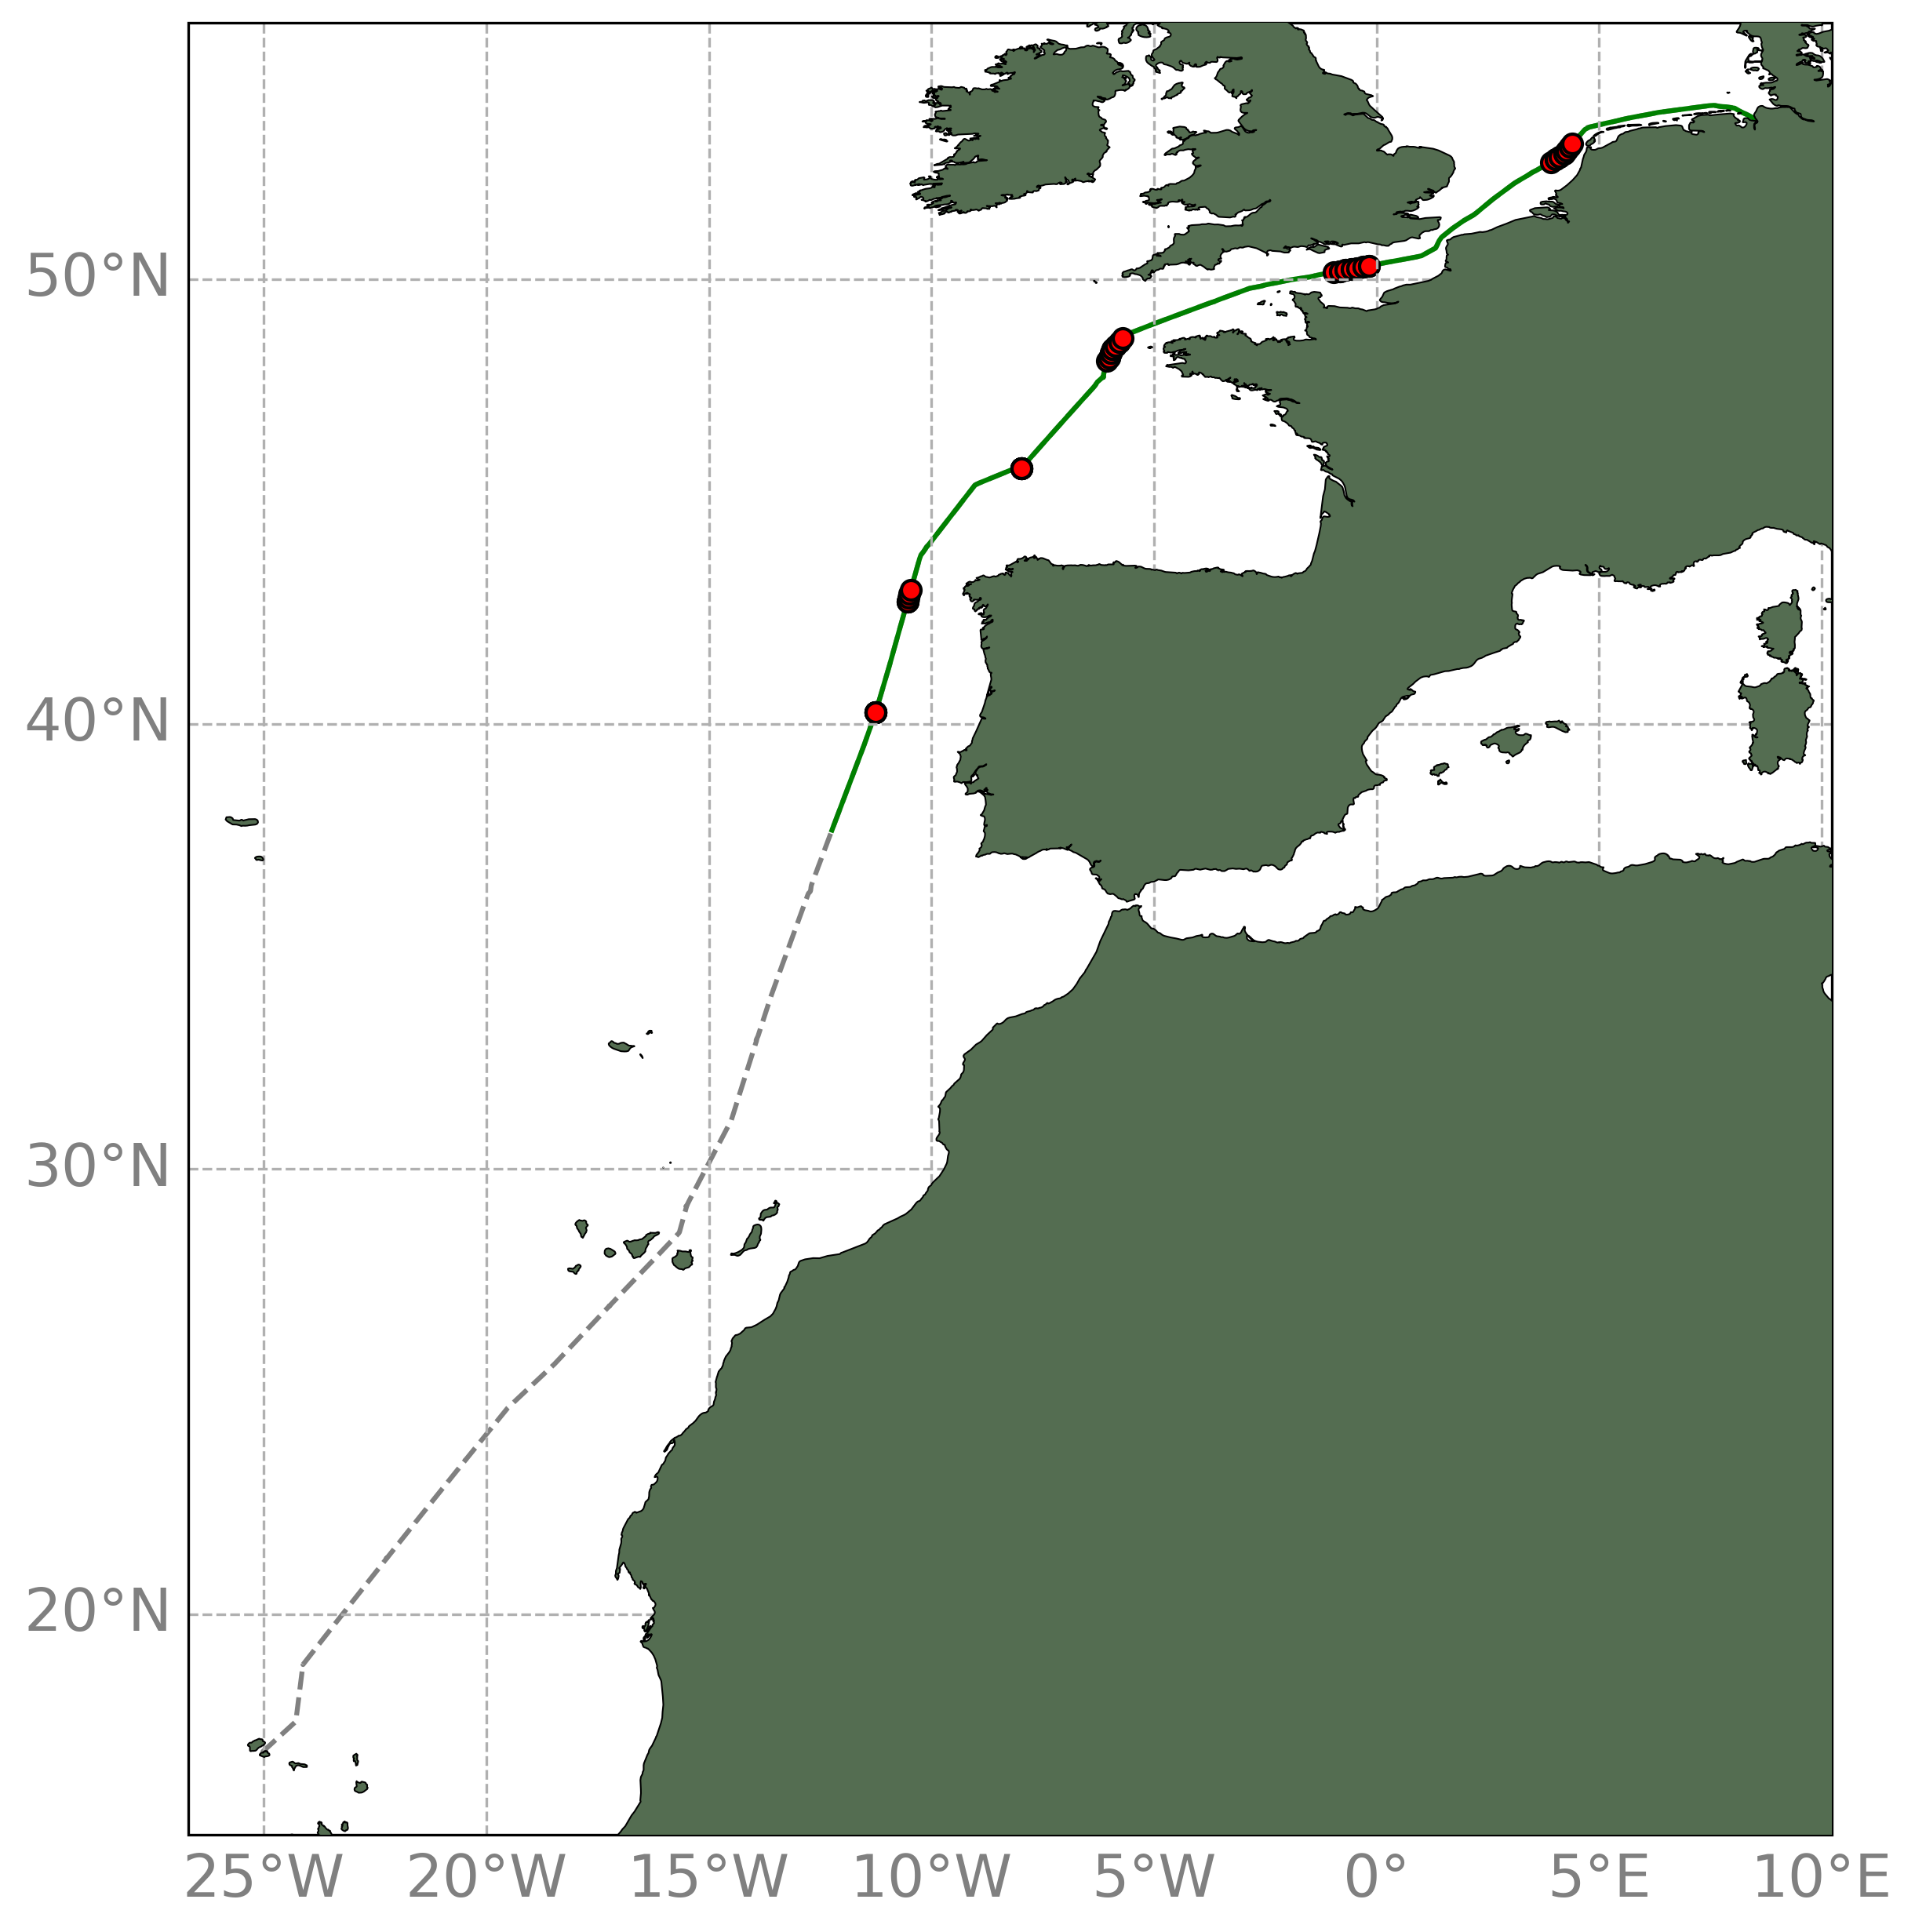

In [19]:
# set up our figure
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

# plot cruise track
p1, = m.plot(df["Longitude"], df["Latitude"], linestyle='--', zorder=1, color='0.5', transform = cartopy.crs.PlateCarree())
p2, = m.plot(df_subset["Longitude"], df_subset["Latitude"], zorder=2, color='g', transform = cartopy.crs.PlateCarree())
p3 = m.scatter(df_subset["Longitude"][product_index], df_subset["Latitude"][product_index], zorder=2, transform = cartopy.crs.PlateCarree(), color='r', edgecolor='k')

# add some map embellishments
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=8)
g1 = m.gridlines(draw_labels = True, linestyle='--', zorder=10)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}

plt.show()

You grey dashed line shows the entire cruise track. The green line shows out subset cruise track. The red circles denote where we have matching satellite products, derived from our search. You will note that the red circles are "grouped". This happens as the ship if often constantly underway, but the Sentinel-3 satellite usually only overpasses around once or twice per day (depending on latitude), at around 10:30 local time. The wider we make our temporal window, the more circles we will see in each group, and vice-versa.

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Downloading data from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

Now we have our list of matching products, lets go get them! The cell below will iterate through our product list and fetch the components of each product we specified in our config file. By default, we have chosen to fetch the neural network chlorophyll variable (chl_nn.nc), image coordinates (geo_coordinates.nc) and flags file (wqsf.nc).

In [20]:
if download_data:
    for product, count in zip(np.unique(product_list), range(len(np.unique(product_list)))):
    
        if "all" in components:
    
            # download the required products
            with product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
                print(f'Downloading ({count+1}/{len(np.unique(product_list))}) {fsrc.name}.')
                shutil.copyfileobj(fsrc, fdst)
        
            # Unzip the required products
            with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
                for file in zip_ref.namelist():
                    if file.startswith(str(product)):
                        zip_ref.extract(file, download_dir)
        
            # tidy up the required products
            os.remove(fdst.name)
    
        else:
            
            product_download_directory = os.path.join(download_dir, str(product))
            os.makedirs(product_download_directory, exist_ok=True)
    
            # download the required product components
            for entry in product.entries:
                res = [ele for ele in components if(ele == os.path.basename(entry))]
                if res:
                    with product.open(entry=entry) as fsrc, open(os.path.join(product_download_directory, fsrc.name),
                                                                mode='wb') as fdst:
                        print(f'Downloading ({count+1}/{len(np.unique(product_list))}) {product}: {fsrc.name}.')
                        shutil.copyfileobj(fsrc, fdst)

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Extracting our satellite data
[Back to top](#TOCTOP)

</div>

Now we have downloaded the matching products, we can cycle through them and read in the data. In this case, we are choosing to extract **only the nearest point** to the cruise location. We apply our specified flags to this, removing any poor quality data. Rows with flagged data are denoted as "flagged". In practice, this may not be the most reliable approach and we highly recommend that you check our guidance on **<a href="https://user.eumetsat.int/s3/eup-strapi-media/Recommendations_for_Sentinel_3_OLCI_Ocean_Colour_product_validations_in_comparison_with_in_situ_measurements_Matchup_Protocols_V8_B_e6c62ce677.pdf">ocean colour match-up protocols</a>** if you wish to investigate more comprehensively.

[01102] reading:	S3A_OL_2_WFR____20230405T110105_20230405T110405_20230406T233625_0179_097_208_2340_MAR_O_NT_003.SEN3
[01105] reading:	S3A_OL_2_WFR____20230405T110105_20230405T110405_20230406T233625_0179_097_208_2340_MAR_O_NT_003.SEN3
[01108] reading:	S3A_OL_2_WFR____20230405T110105_20230405T110405_20230406T233625_0179_097_208_2340_MAR_O_NT_003.SEN3
[01111] reading:	S3A_OL_2_WFR____20230405T110105_20230405T110405_20230406T233625_0179_097_208_2340_MAR_O_NT_003.SEN3
[01114] reading:	S3A_OL_2_WFR____20230405T110105_20230405T110405_20230406T233625_0179_097_208_2340_MAR_O_NT_003.SEN3
[01117] reading:	S3A_OL_2_WFR____20230405T110105_20230405T110405_20230406T233625_0179_097_208_2340_MAR_O_NT_003.SEN3
[01243] reading:	S3A_OL_2_WFR____20230406T103155_20230406T103455_20230407T232535_0180_097_222_2160_MAR_O_NT_003.SEN3
[01246] reading:	S3A_OL_2_WFR____20230406T103155_20230406T103455_20230407T232535_0180_097_222_2160_MAR_O_NT_003.SEN3
[01249] reading:	S3A_OL_2_WFR____20230406T103155_20230406T103455

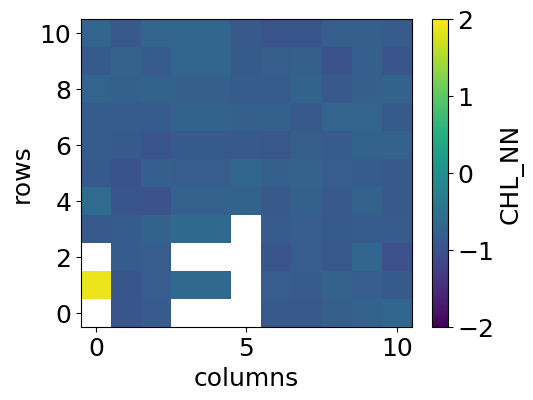

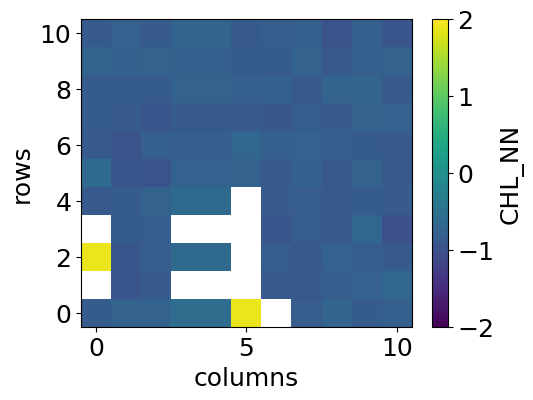

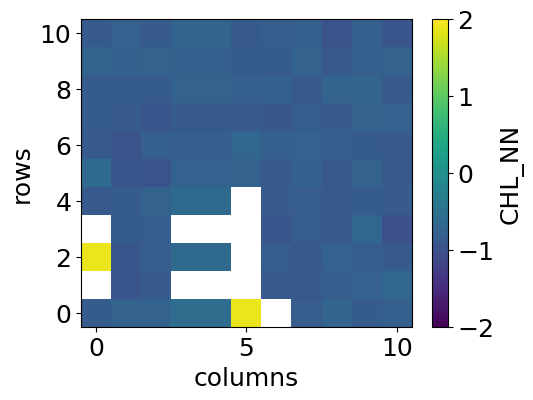

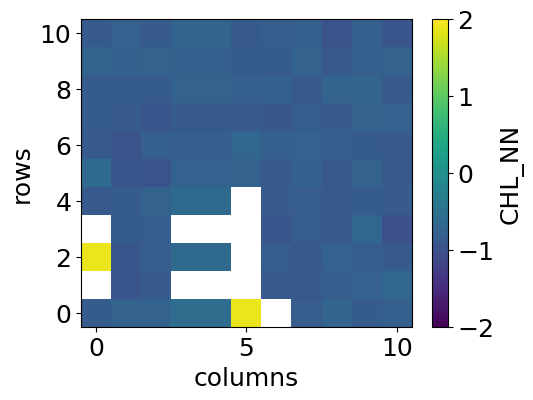

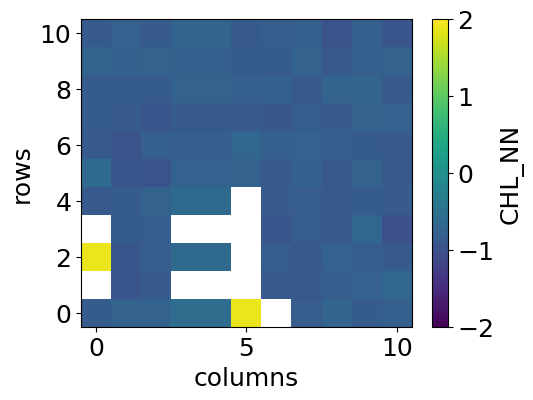

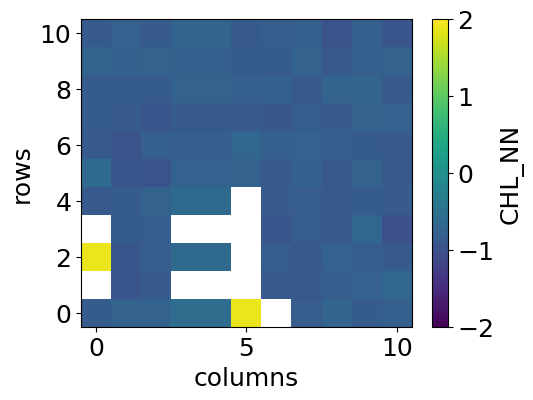

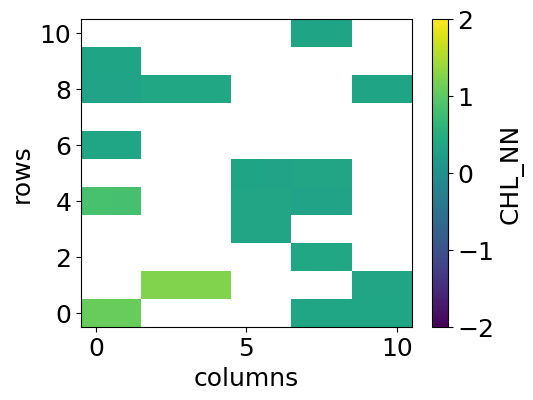

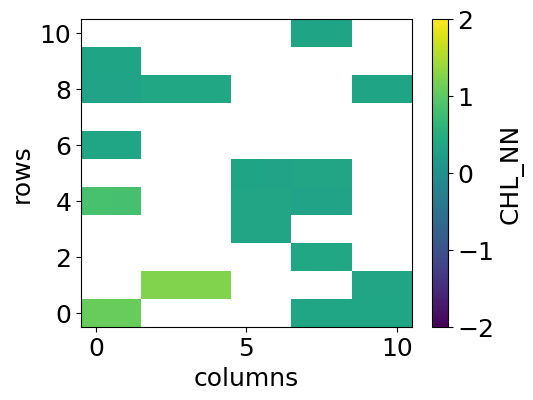

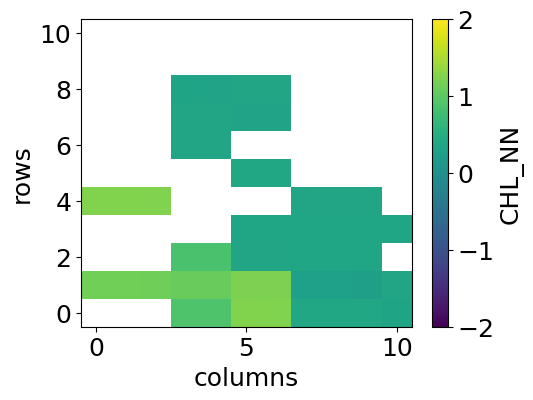

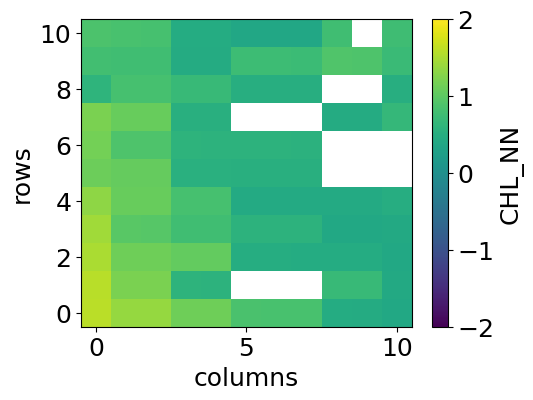

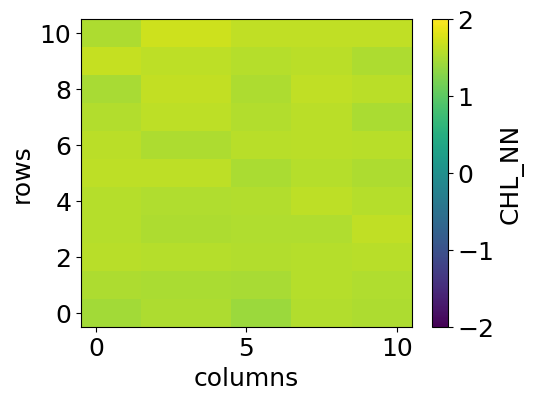

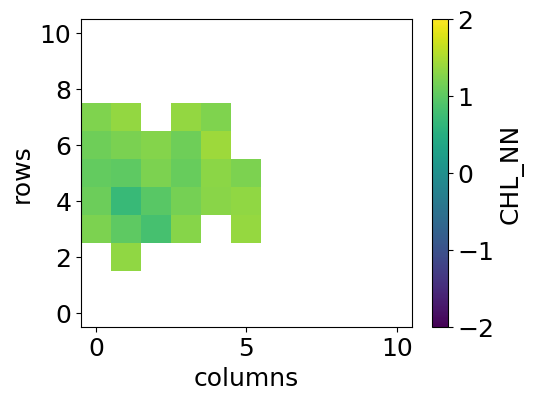

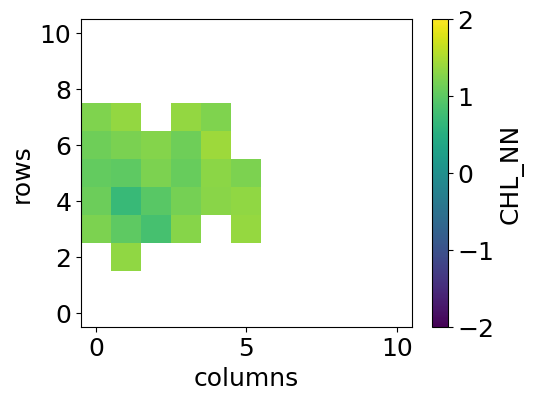

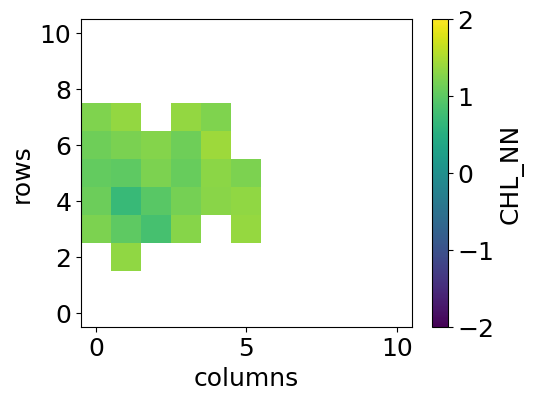

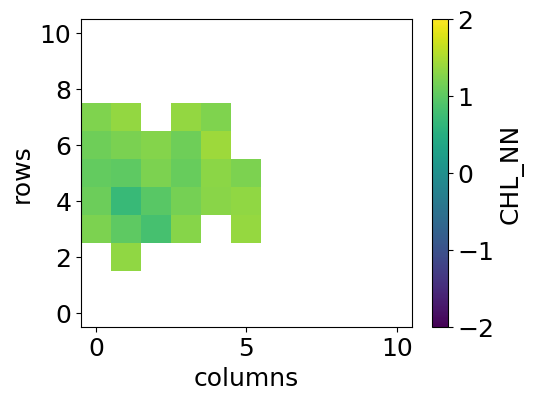

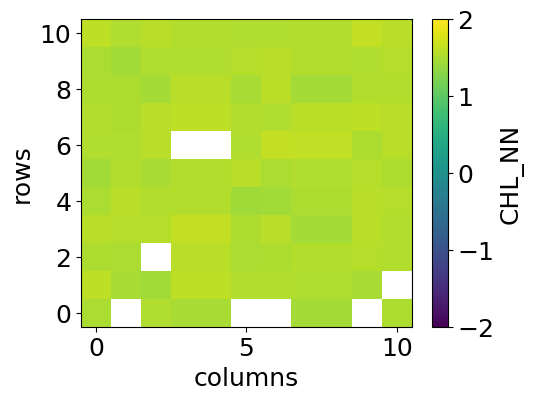

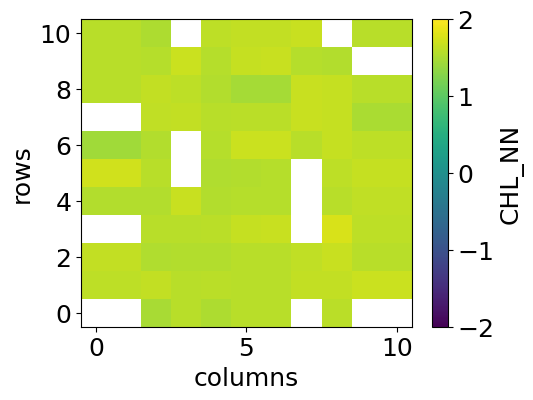

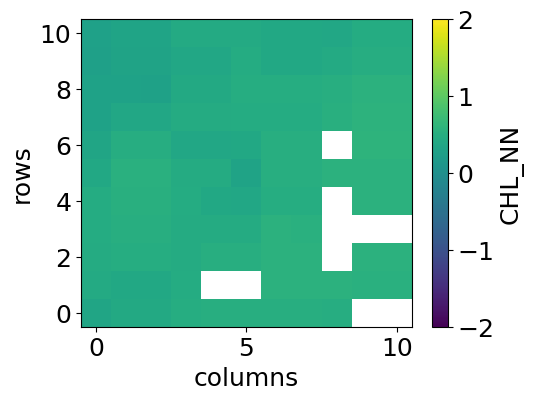

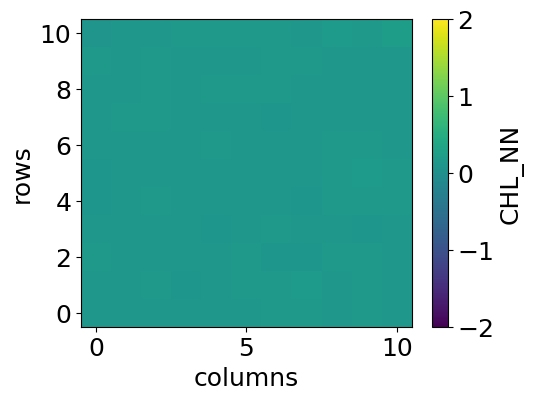

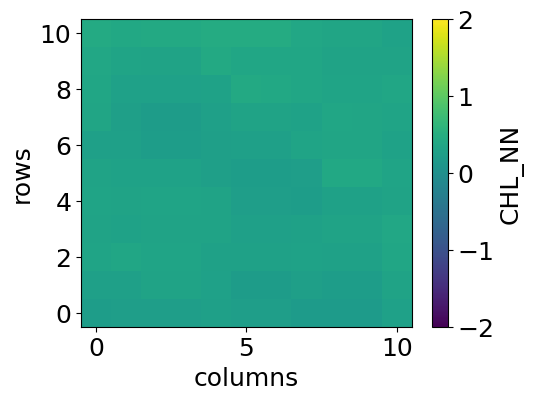

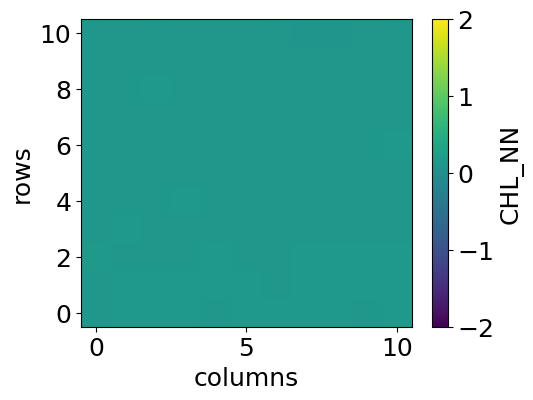

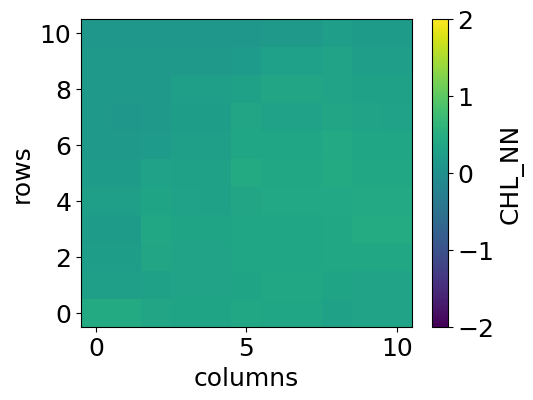

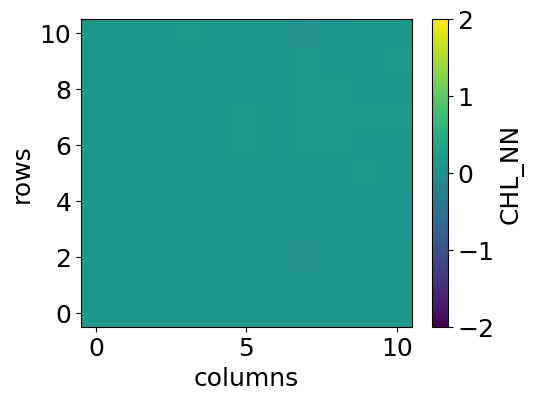

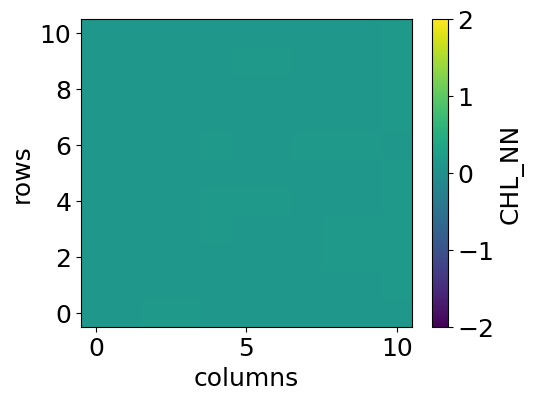

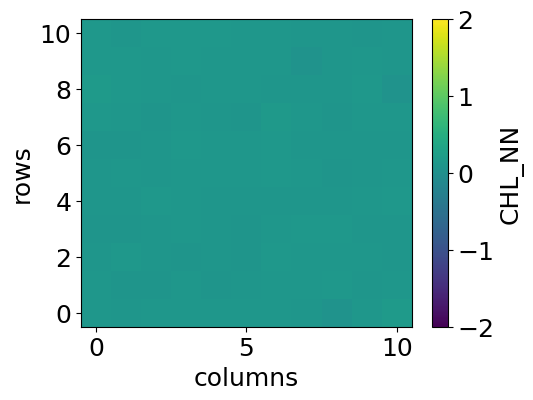

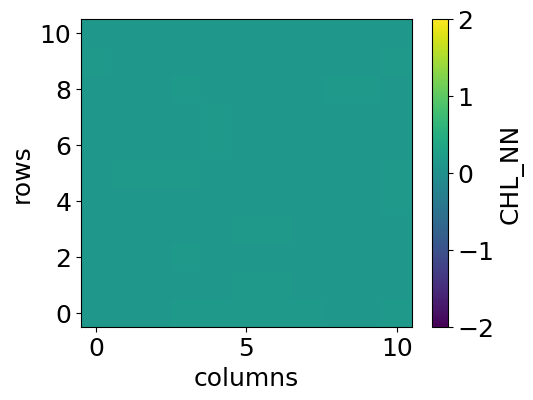

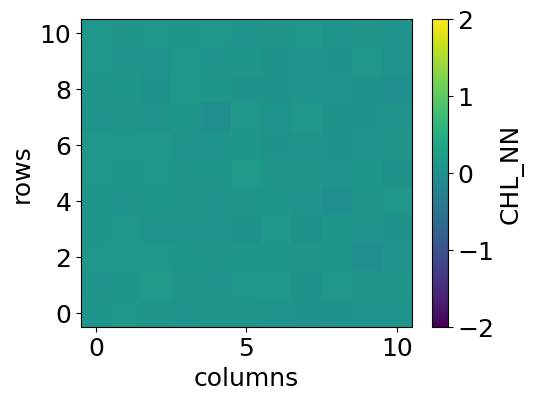

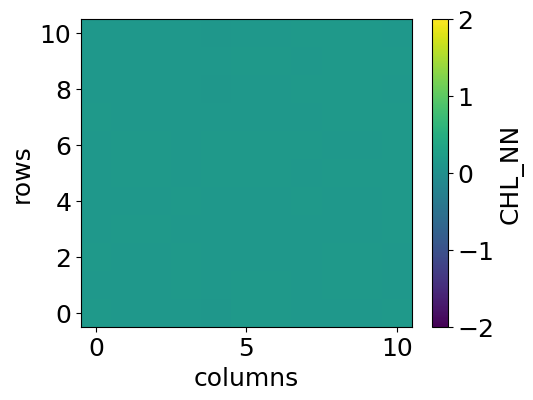

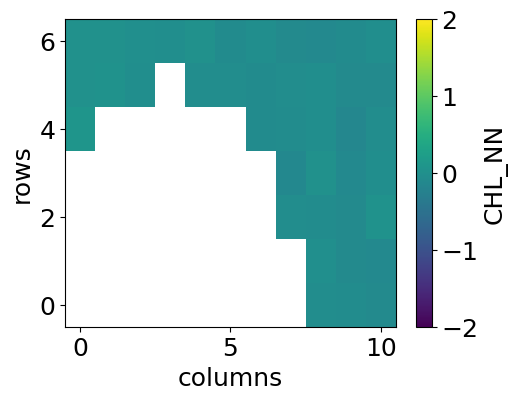

In [21]:
product_times = [datetime.datetime.strptime(df_time, config["cruise_processing"]["tformat"]) for df_time in df_subset[tvar][product_index]]
product_chls = []
previous_product = None

for product, index in zip(product_list, product_index):

    # keep the product open if we read from it again
    if product != previous_product:
        try:
            da.close()
        except:
            pass
        flag_mask = eumartools.flag_mask(os.path.join(download_dir, str(product),
                                         config["data_flagging"]["flag_file"]),
                                         config["data_flagging"]["flag_var"], flags).astype(float)

        flag_mask[flag_mask == 1.0] = np.nan
        flag_mask[flag_mask == 0.0] = 1.0
        da = xr.open_mfdataset(os.path.join(download_dir, str(product), "*.nc"))

    pt = (da.longitude - df["Longitude"][index])**2 + (da.latitude - df["Latitude"][index])**2   
    ii, jj = np.where(pt == np.nanmin(pt))

    if np.isnan(flag_mask[ii[0],jj[0]]):
        print(f"[{str(index).zfill(5)}] flagged:\t{product}")
        product_chls.append(np.nan)
    else:
        print(f"[{str(index).zfill(5)}] reading:\t{product}")
        product_chls.append(da.CHL_NN[ii[0], jj[0]].values)

        # preview image
        if config["data_flagging"]["image_preview"] == "True":
            try:
                i1 = ii[0] - int(config["data_flagging"]["preview_size"])
                i2 = ii[0] + int(config["data_flagging"]["preview_size"]) + 1
                j1 = jj[0] - int(config["data_flagging"]["preview_size"])
                j2 = jj[0] + int(config["data_flagging"]["preview_size"]) + 1
                extract = da.CHL_NN[i1:i2, j1:j2] * flag_mask[i1:i2, j1:j2]
                extract.plot.pcolormesh(vmin=-2, vmax=2, cmap="viridis", size=4)
            except:
                pass

    previous_product = product

<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Viewing our extracted data
[Back to top](#TOCTOP)

</div>

Lets now plot our cruise track again, but this time we will overlay the chlorophyll concentrations extracted from our Sentinel-3 OLCI products.

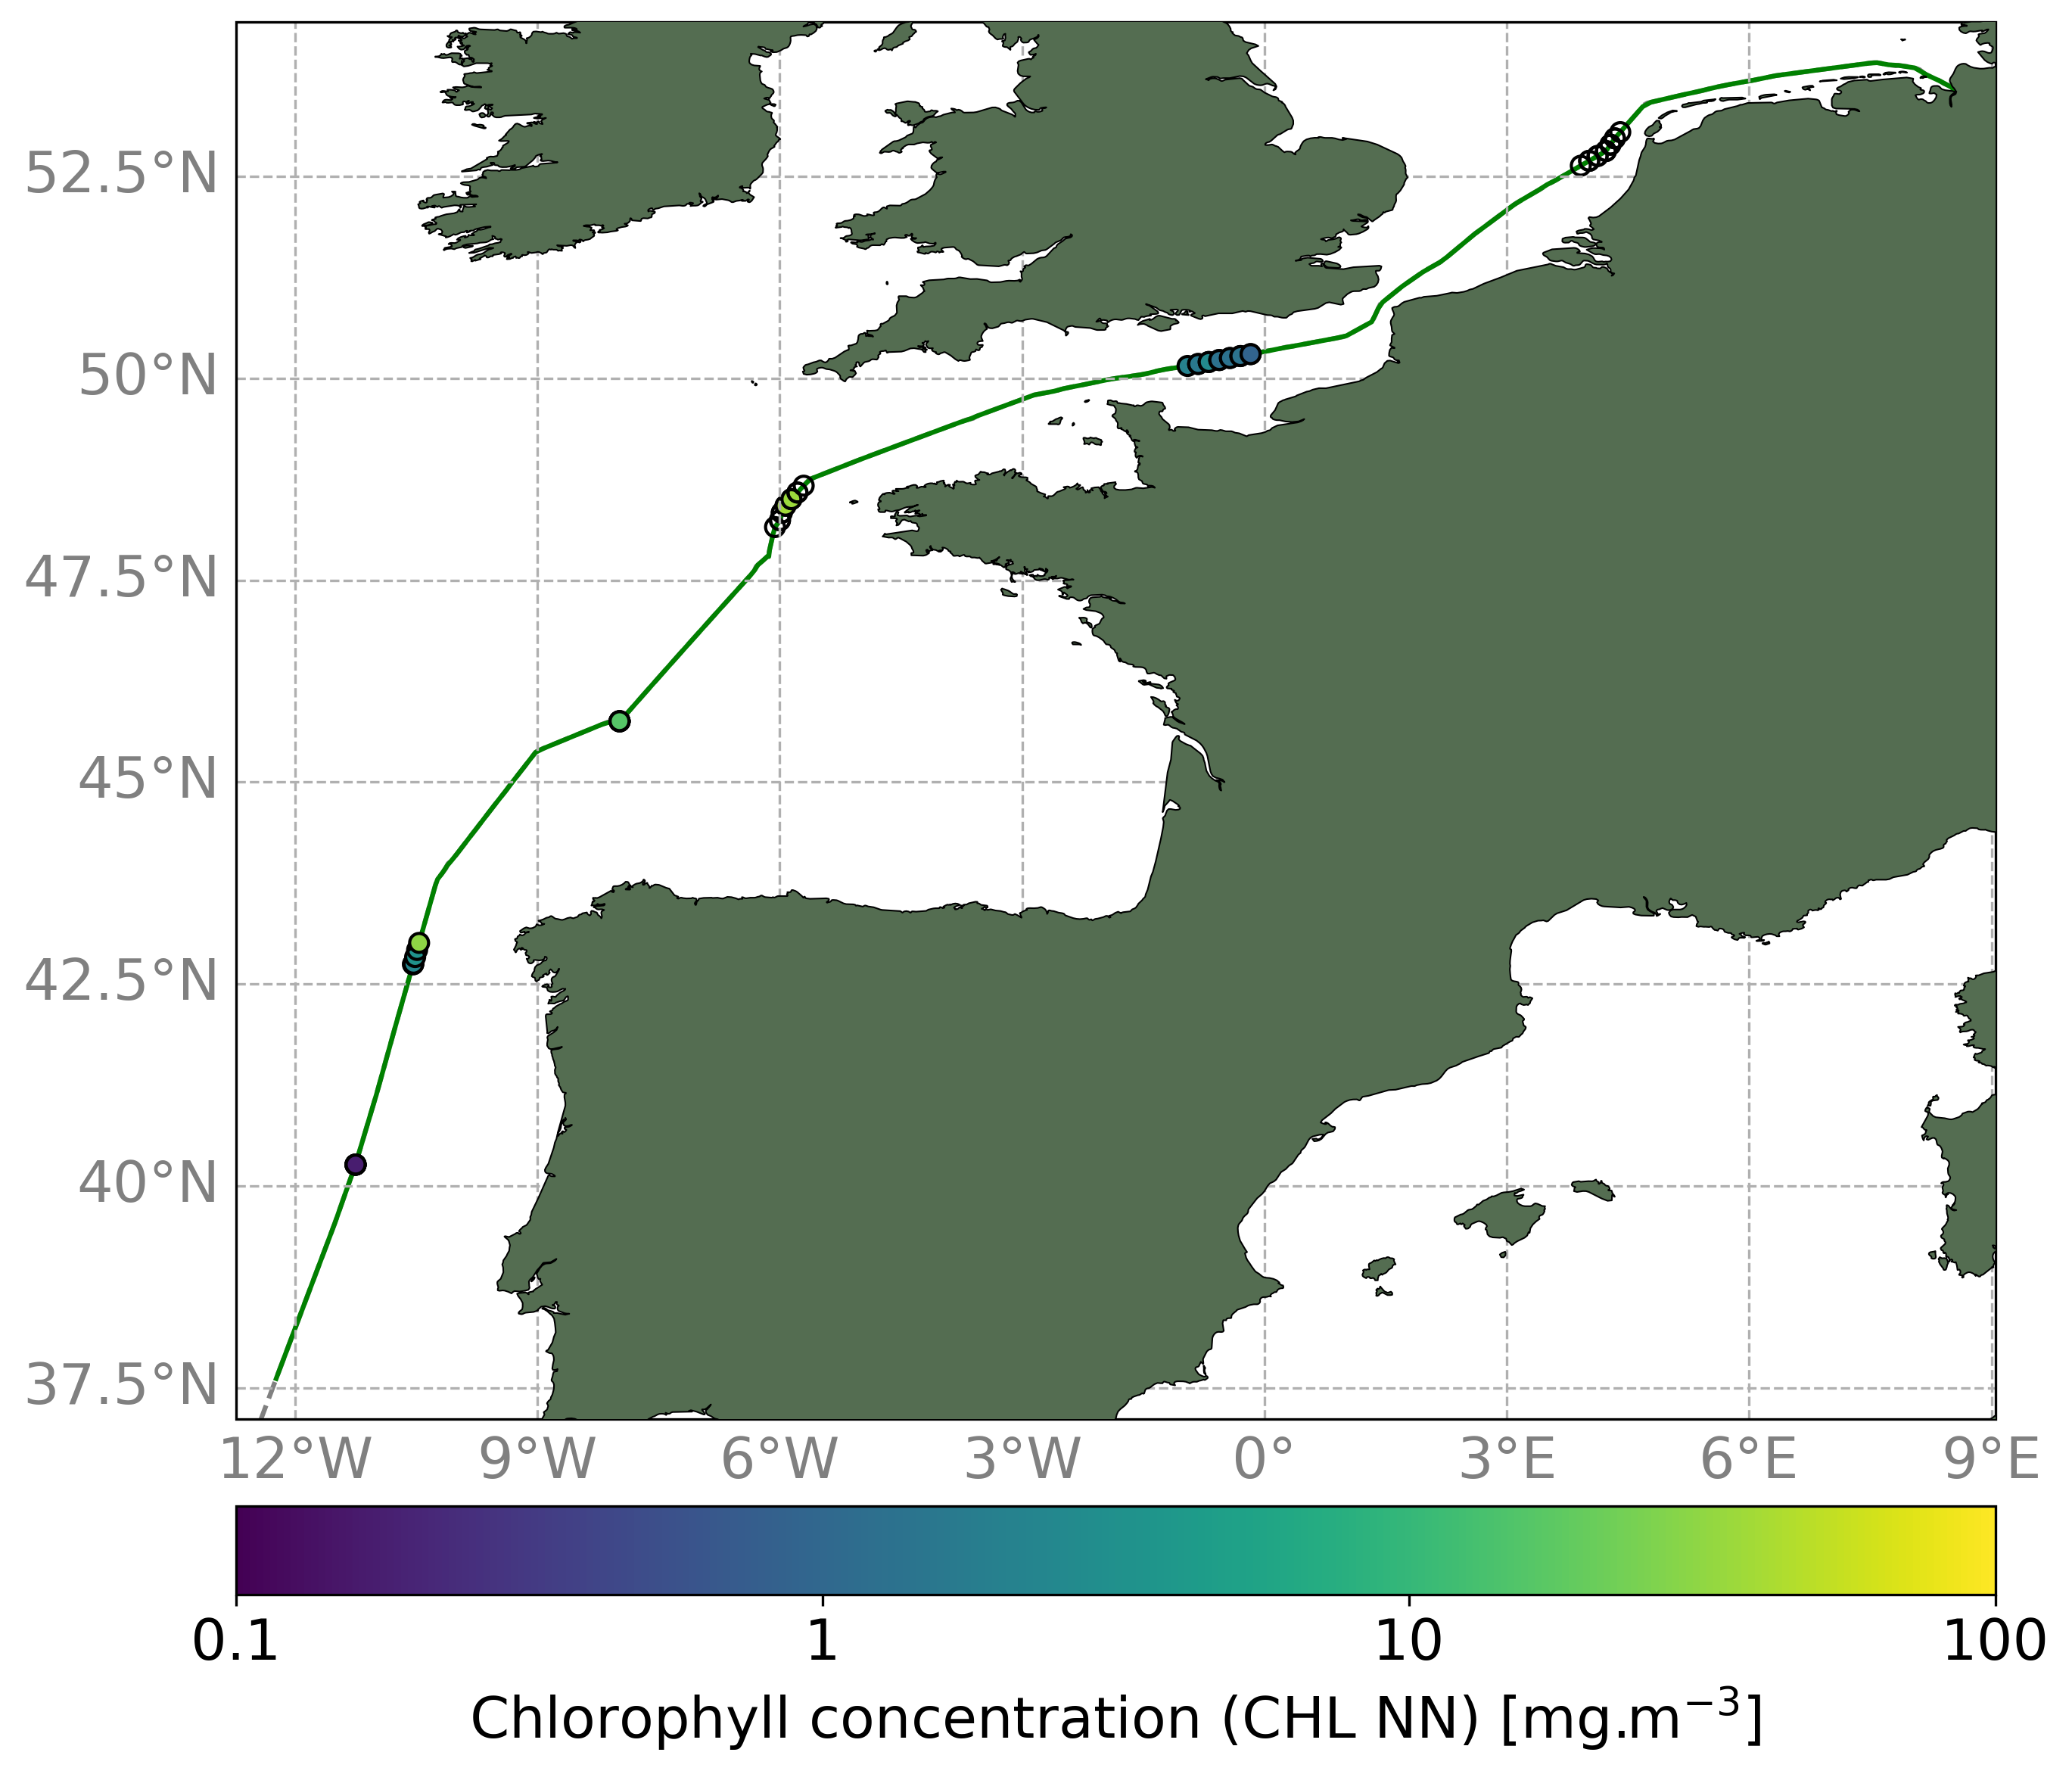

In [22]:
# set up our figure
pad = 0.5
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

# plot cruise track
p1, = m.plot(df["Longitude"], df["Latitude"], linestyle='--', zorder=1, color='0.5', transform = cartopy.crs.PlateCarree())
p2, = m.plot(df_subset["Longitude"], df_subset["Latitude"], zorder=2, color='g', transform = cartopy.crs.PlateCarree())
p3 = m.scatter(df_subset["Longitude"][product_index], df_subset["Latitude"][product_index], zorder=2, transform = cartopy.crs.PlateCarree(),
               c=np.array(product_chls), edgecolor='k', vmin=-1, vmax=2)

m.set_extent([min(df_subset["Longitude"]) - pad, max(df_subset["Longitude"]) + pad, min(df_subset["Latitude"]) - pad, max(df_subset["Latitude"]) + pad])

# add some map embellishments
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=8)
g1 = m.gridlines(draw_labels = True, linestyle='--', zorder=10)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}

# add a colour bar
cbar = fig.colorbar(p3, ax=m, location='bottom', pad=0.05)
ticks = [-1, 0, 1, 2]
cbar.set_ticks(ticks)
cbar.set_ticklabels([10**tick for tick in ticks])
cbar.set_label('Chlorophyll concentration (CHL NN) [mg.m$^{-3}$]')

plt.show()

Alternatively, we could look at our data as a time series...

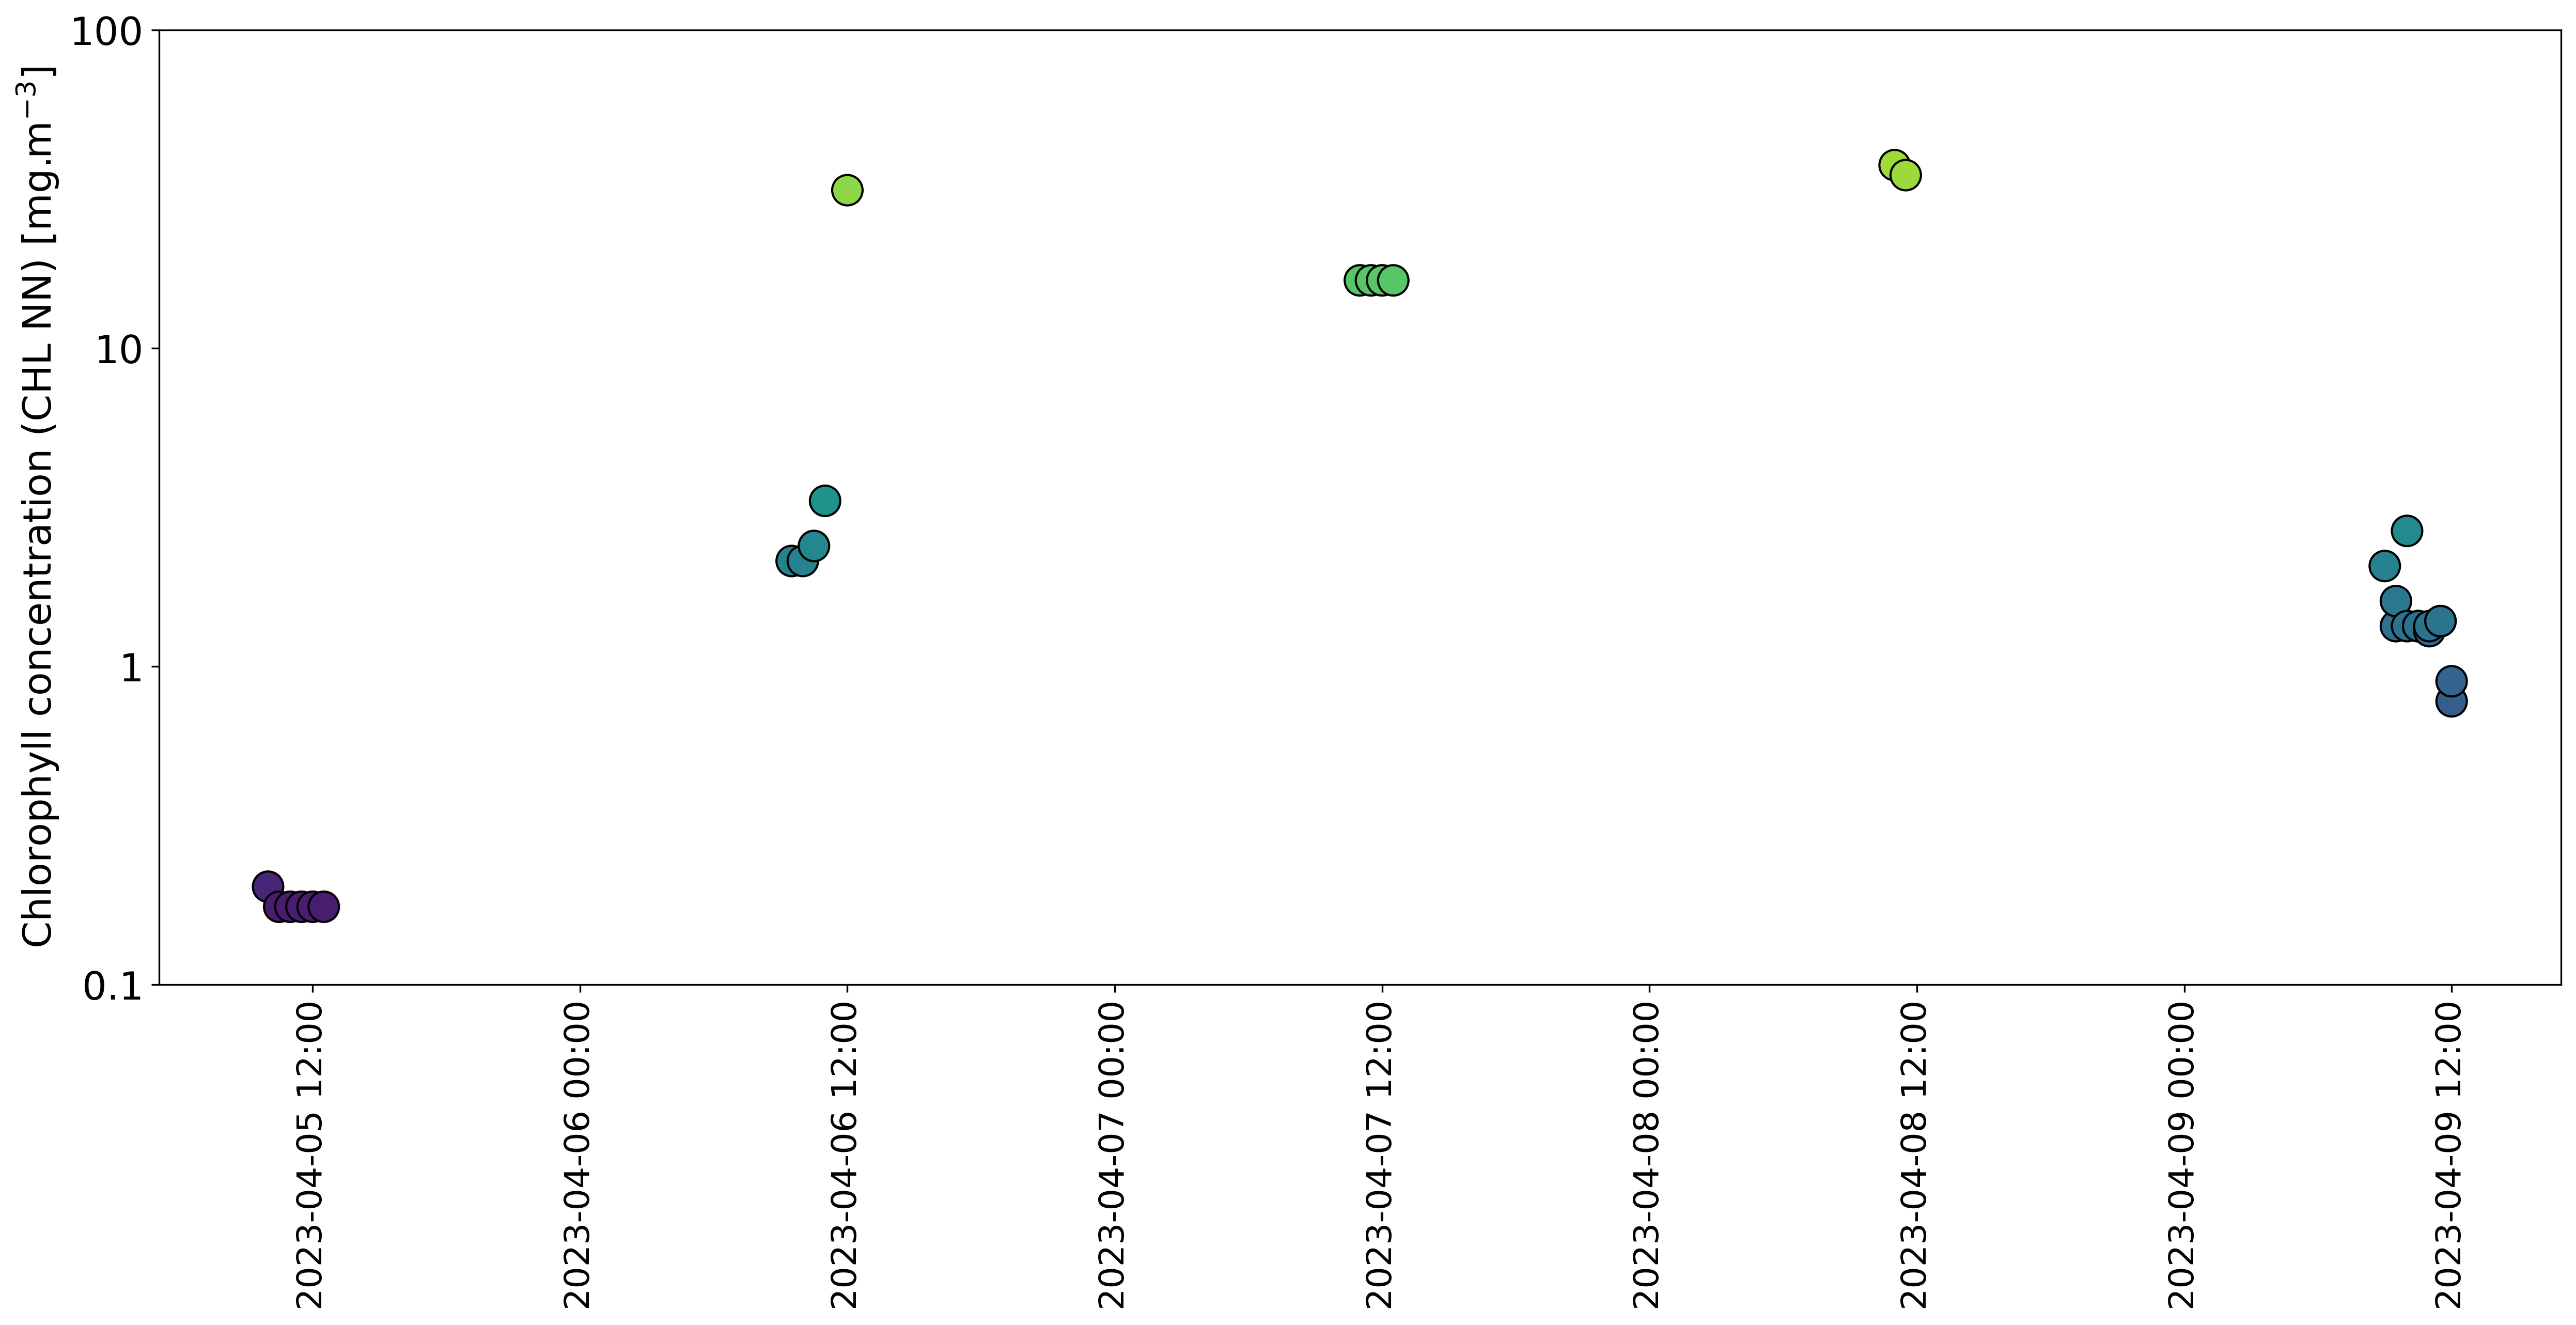

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20,8), dpi=300)
p1 = plt.scatter(product_times, np.array(product_chls), c=np.array(product_chls), edgecolor='k',
                 vmin=-1, vmax=2, s=200)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(ticks, [10**tick for tick in ticks])
plt.ylabel('Chlorophyll concentration (CHL NN) [mg.m$^{-3}$]');

<div class="alert alert-info" role="alert">

## <a id='section9'></a>9. Conclusions
[Back to top](#TOCTOP)

</div>

From the workflow above you should have learned how to read in a typical data file containing cruise track information, and use this to conduct a search for coincident satellite data. Downloaded data can be visualised to provide important spatio-temporal context for the cruise data. The example showed a simple extraction of data from the nearest pixel in the satellite image to the cruise track. Careful consideration should be given when doing these comparisons, and in the case of OLCI matchup analysis we recommend using the the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS" target="_blank">ThoMaS toolkit</a>**  for ocean colour validation with OLCI (EUMETSAT Gitlab) and our **<a href="https://gitlab.eumetsat.int/eo-lab-usc-open/ocean/sensors/learn-olci/-/blob/main/2_OLCI_advanced/2_4_OLCI_matchup_validation.ipynb?ref_type=heads" target="_blank">Jupyter Notebook</a>** on using the ThoMaS toolkit for ocean colour validation.

It is likely that you may want to run this code in an automated way, so we have also provided a Python version (not a notebook) that will run steps 1, 2, 3, 4 and 6 from above. This version is called Cruise_tracker.py and can be found in the same directory as this notebook. It can be run as follows;

```
python Cruise_tracker.py (this will run with the default config.ini file)

OR

python Cruise_tracker.py -c <CONFIG_FILE> (this will run with the config file you specify as <CONFIG_FILE))

OR

python Cruise_tracker.py --search_only -c <CONFIG_FILE> (this will run with the config file you specify as <CONFIG_FILE), but will only search for, and not download, products)
```

<div class="alert alert-warning" role="alert">

## <a id='section10'></a>10. Challenge (optional)
[Back to top](#TOCTOP)

</div>

Now that you have learned how to search for and download data associated with a cruise track, there are many other variations of this workflow you could explore.
- Try and extract a different variable from the OLCI level-2 data e.g. TSM_NN
- Set up a search and download data from another data collection e.g. SST or Altimetry - you will have to adapt how the data is read, and note that other collections might have much bigger files!

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>